# HOGARES EN POBREZA EN COSTA RICA
PROYECCION 2020-2024, A PARTIR DE LA ENAHO 2010-2019

CONTEXTO:
Costa Rica se ha mantenido en un nivel de pobreza cercano al 20% de los hogares en los últimos diez años, según la medición oficial realizada anualmente por el Instituto Nacional de Estadística y Censos (INEC) a través de la Encuesta Nacional de Hogares (ENAHO).

PROBLEMA:
¿Cuál será el nivel de pobreza de los hogares de Costa Rica por el método de línea de pobreza (LP) para los próximos 5 años (2020-2024), según región de planificación?

OBJETIVO:
Proyectar el nivel de pobreza de los hogares de Costa Rica por el método de línea de pobreza (LP) para los próximos 5 años (2020-2024), según región de planificación.

In [1]:
#libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as pltfig
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.integrate import trapz
from pandas import Series, DataFrame
import sklearn
import scipy
from math import sqrt
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
import plotly.offline as py
from fbprophet import Prophet
import logging
import warnings
from holidays import WEEKEND, HolidayBase, easter, rd
from dateutil.easter import easter
from dateutil.relativedelta import relativedelta as rd
import datetime

In [2]:
#data
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df.head()

,ANO,REGION,NO POBRES,TOTAL POBREZA,POBREZA NO EXTREMA,POBREZA EXTREMA
0,31-12-2010,0-TOTAL,78.79,21.21,15.46,5.75
1,31-12-2011,0-TOTAL,78.35,21.65,15.23,6.42
2,31-12-2012,0-TOTAL,79.43,20.57,14.32,6.25
3,31-12-2013,0-TOTAL,79.30,20.70,14.27,6.43
4,31-12-2014,0-TOTAL,77.63,22.37,15.72,6.65


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
ANO                     70 non-null object
REGION                  70 non-null object
 NO POBRES              70 non-null float64
 TOTAL POBREZA          70 non-null float64
 POBREZA NO EXTREMA     70 non-null float64
 POBREZA EXTREMA        70 non-null float64
dtypes: float64(4), object(2)
memory usage: 3.4+ KB


In [4]:
#data types
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])

In [5]:
df
df.dtypes

ANO                   datetime64[ns]
REGION                      category
NO_POBRES                    float64
TOTAL_POBREZA                float64
POBREZA_NO_EXTREMA           float64
POBREZA_EXTREMA              float64
dtype: object

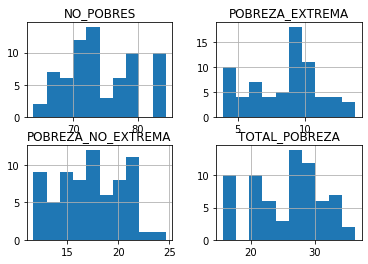

In [6]:
df.drop(['ANO'],1).hist()
plt.savefig('1.histograma.png', dpi=300, bbox_inches='tight')
plt.show()

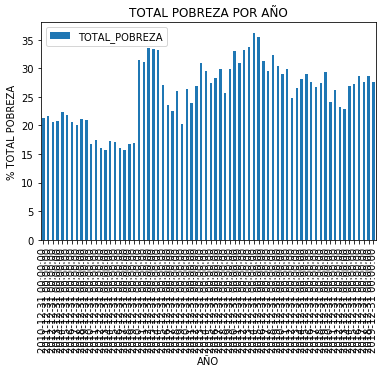

In [7]:
df.plot(kind='bar',x='ANO',y='TOTAL_POBREZA')
plt.title("TOTAL POBREZA POR AÑO")
plt.ylabel('% TOTAL POBREZA')
plt.xlabel('AÑO')
plt.savefig('2.bar.png', dpi=300, bbox_inches='tight')
plt.show();

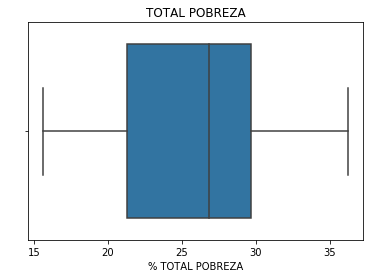

In [8]:
sns.boxplot(x=df['TOTAL_POBREZA'])
plt.title("TOTAL POBREZA")
plt.ylabel(' ')
plt.xlabel('% TOTAL POBREZA')
plt.savefig('3.boxplotPobreza.png', dpi=300, bbox_inches='tight')
plt.show();

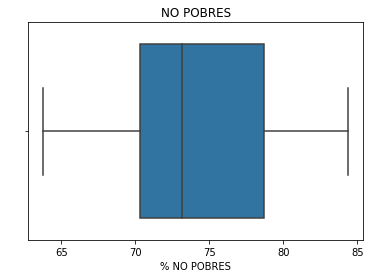

In [9]:
sns.boxplot(x=df['NO_POBRES'])
plt.title("NO POBRES")
plt.ylabel(' ')
plt.xlabel('% NO POBRES')
plt.savefig('4.boxplotNopobres.png', dpi=300, bbox_inches='tight')
plt.show();

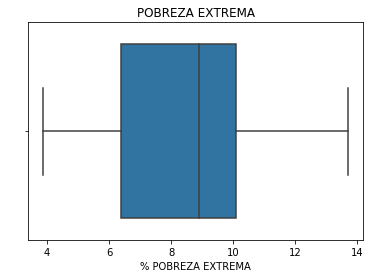

In [10]:
sns.boxplot(x=df['POBREZA_EXTREMA'])
plt.title("POBREZA EXTREMA")
plt.ylabel(' ')
plt.xlabel('% POBREZA EXTREMA')
plt.savefig('5.boxplotExtrema.png', dpi=300, bbox_inches='tight')
plt.show();

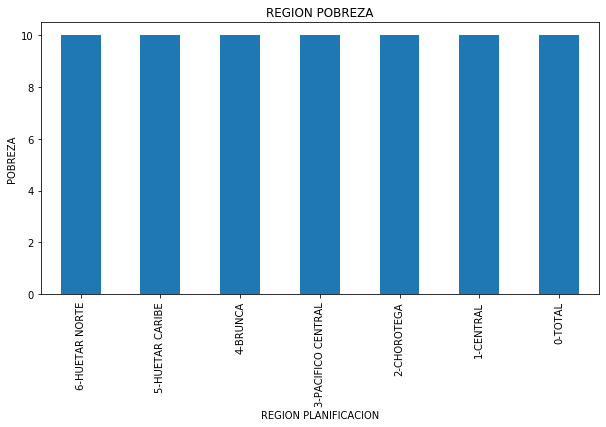

In [11]:
# Plotting a Histogram
df.REGION.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("REGION POBREZA")
plt.ylabel('POBREZA')
plt.xlabel('REGION PLANIFICACION')
plt.savefig('6.barRegion.png', dpi=300, bbox_inches='tight')
plt.show();

INFO:numexpr.utils:NumExpr defaulting to 4 threads.


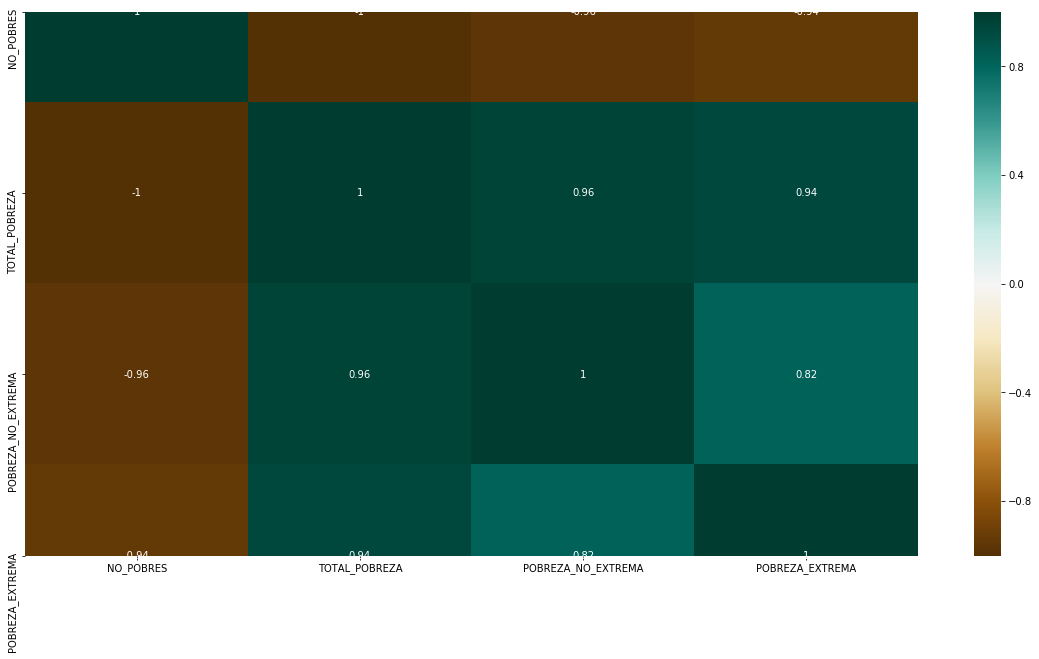

In [12]:
# Finding the relations between the variables.Heat maps
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c
plt.savefig('7.coor.png', dpi=300, bbox_inches='tight')
plt.show();

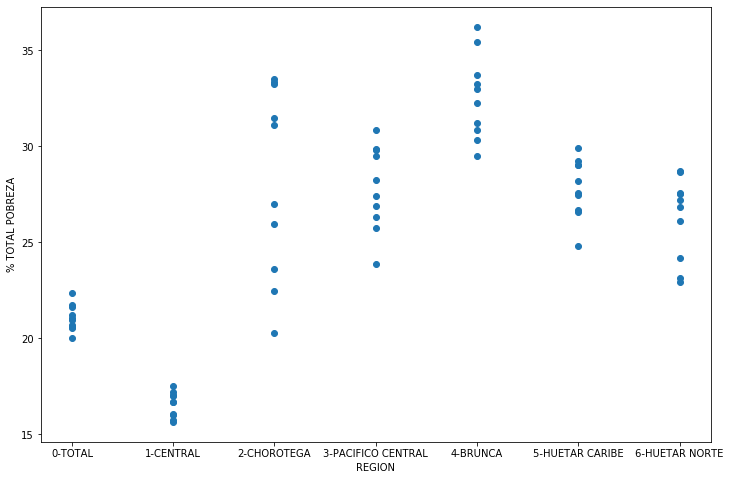

In [13]:
# Plotting a scatterplot
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df['REGION'], df['TOTAL_POBREZA'])
ax.set_xlabel('REGION')
ax.set_ylabel('% TOTAL POBREZA')
plt.savefig('8.scatterplotPobreza.png', dpi=300, bbox_inches='tight')
plt.show();

In [14]:
#FORECASTING
#df.ANO == 'ds'
#df.TOTAL_POBREZA == 'y'

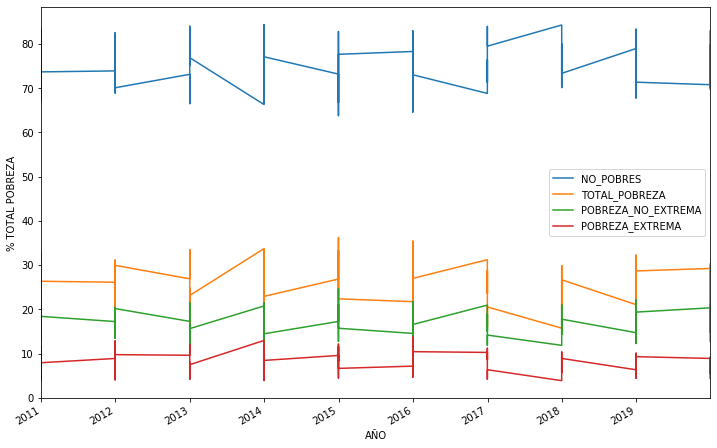

In [15]:
#plot our time series
ax = df.set_index('ANO').plot(figsize=(12, 8))
ax.set_ylabel('% TOTAL POBREZA')
ax.set_xlabel('AÑO')
plt.savefig('9.timeseriePobreza.png', dpi=300, bbox_inches='tight')
plt.show();

In [16]:
#Drop data
#valores unicos df['REGION'].nunique()
# agrupar df.groupby('', as_index=False).agg({"NO_POBRES": "sum"})
#df2['ds'] = pd.DatetimeIndex(df2['ds'])
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])
#filtro 0
df = df[df.REGION == '0-TOTAL']
#cambio nombre columnas
df = df.rename(columns={'ANO': 'ds', 'TOTAL_POBREZA': 'y'})

#agrupar
df0  = df.drop(['NO_POBRES', 'POBREZA_NO_EXTREMA', 'POBREZA_EXTREMA', 'REGION'], axis=1)
df0['y']= df0['y'].astype('float64')
df0['ds'] = pd.DatetimeIndex(df0['ds'])
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 0 to 9
Data columns (total 2 columns):
ds    10 non-null datetime64[ns]
y     10 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [17]:
df0.ds

0   2010-12-31
1   2011-12-31
2   2012-12-31
3   2013-12-31
4   2014-12-31
5   2015-12-31
6   2016-12-31
7   2017-12-31
8   2018-12-31
9   2019-12-31
Name: ds, dtype: datetime64[ns]

In [18]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model0 = Prophet(interval_width=0.95)

In [19]:
#fit method with our DataFrame
model0.fit(df0)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.
/Users/ell/opt/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [20]:
#Prophet with a new DataFrame
future = model0.make_future_dataframe(periods=5, freq='y')
future.tail()

,ds
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31
14,2024-12-31


In [21]:
#DataFrame of future dates is then used as input to the predict method of our fitted model
forecast0 = model0.predict(future)
forecast0[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
#calculo errores

,ds,yhat,yhat_lower,yhat_upper
10,2020-12-31,19.571676,18.836889,20.254346
11,2021-12-31,19.869111,19.158894,20.542397
12,2022-12-31,20.135524,19.442070,20.878453
13,2023-12-31,20.370128,19.616211,21.205521
14,2024-12-31,18.854497,17.935623,19.717874


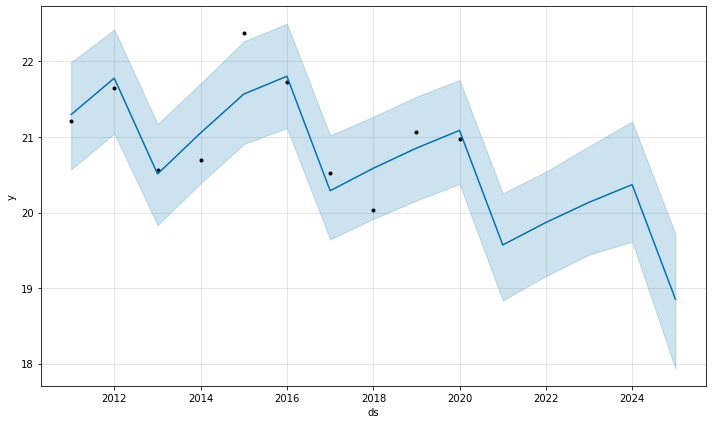

In [22]:
#quickly plot the results of our forecasts
model0.plot(forecast0,
              uncertainty=True)
plt.savefig('10.model0forecast.png', dpi=300, bbox_inches='tight')
plt.show();

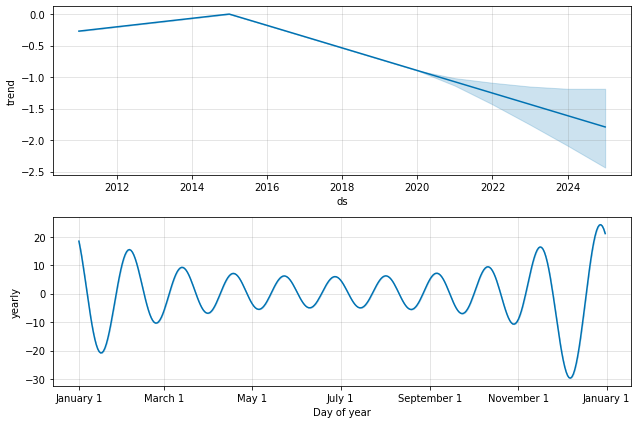

In [23]:
#components of our forecasts
model0.plot_components(forecast0)
plt.savefig('11.0.model0components.png', dpi=300, bbox_inches='tight')
plt.show();

In [24]:
#filtro 1
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])
df = df[df.REGION == '1-CENTRAL']
#cambio nombre columnas
df = df.rename(columns={'ANO': 'ds', 'TOTAL_POBREZA': 'y'})
#agrupar
df1  = df.drop(['NO_POBRES', 'POBREZA_NO_EXTREMA', 'POBREZA_EXTREMA', 'REGION'], axis=1)
df1['y']= df1['y'].astype('float64')
df1['ds'] = pd.DatetimeIndex(df1['ds'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 10 to 19
Data columns (total 2 columns):
ds    10 non-null datetime64[ns]
y     10 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [25]:
df1

,ds,y
10,2010-12-31,16.69
11,2011-12-31,17.50
12,2012-12-31,16.03
13,2013-12-31,15.65
14,2014-12-31,17.22
15,2015-12-31,17.07
16,2016-12-31,16.07
17,2017-12-31,15.74
18,2018-12-31,16.70
19,2019-12-31,16.99


In [26]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model1 = Prophet(interval_width=0.95)

In [27]:
#fit method with our DataFrame
model1.fit(df1)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [28]:
#Prophet with a new DataFrame
future = model1.make_future_dataframe(periods=5, freq='y')
future.tail()

,ds
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31
14,2024-12-31


In [29]:
#DataFrame of future dates is then used as input to the predict method of our fitted model
forecast1 = model1.predict(future)
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2020-12-31,15.669148,15.078635,16.243635
11,2021-12-31,15.920164,15.349651,16.505471
12,2022-12-31,16.353623,15.773881,16.938172
13,2023-12-31,16.968785,16.394263,17.552350
14,2024-12-31,15.529484,14.942526,16.152006


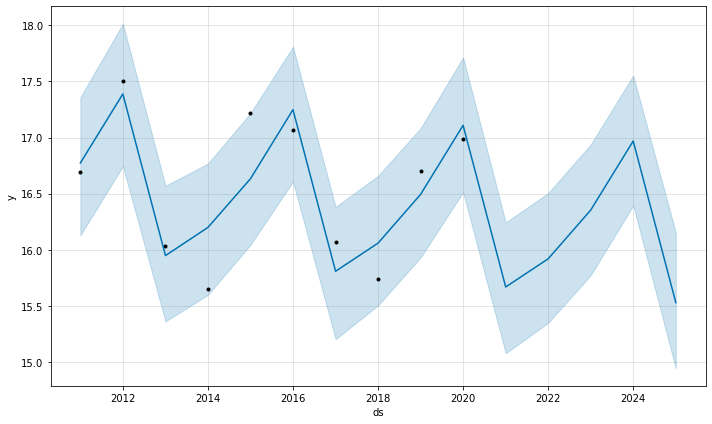

In [30]:
#quickly plot the results of our forecasts
model1.plot(forecast1,
              uncertainty=True)
plt.savefig('11.1.model1forecast.png', dpi=300, bbox_inches='tight')
plt.show();

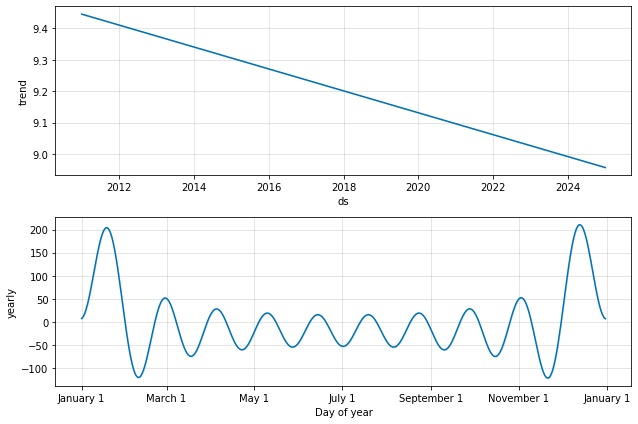

In [31]:
#components of our forecasts
model1.plot_components(forecast1)
plt.savefig('12.0.model1components.png', dpi=300, bbox_inches='tight')
plt.show();

In [32]:
#filtro 2
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])
df = df[df.REGION == '2-CHOROTEGA']
#cambio nombre columnas
df = df.rename(columns={'ANO': 'ds', 'TOTAL_POBREZA': 'y'})
#agrupar
df2  = df.drop(['NO_POBRES', 'POBREZA_NO_EXTREMA', 'POBREZA_EXTREMA', 'REGION'], axis=1)
df2['y']= df2['y'].astype('float64')
df2['ds'] = pd.DatetimeIndex(df2['ds'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 20 to 29
Data columns (total 2 columns):
ds    10 non-null datetime64[ns]
y     10 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [33]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model2 = Prophet(interval_width=0.95)

In [34]:
#fit method with our DataFrame
model2.fit(df2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [35]:
#Prophet with a new DataFrame
future = model2.make_future_dataframe(periods=5, freq='y')
future.tail()

,ds
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31
14,2024-12-31


In [36]:
#DataFrame of future dates is then used as input to the predict method of our fitted model
forecast2 = model2.predict(future)
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2020-12-31,21.017044,16.277508,25.833646
11,2021-12-31,19.642892,14.700636,24.974990
12,2022-12-31,17.978831,12.674173,22.467519
13,2023-12-31,16.025196,10.750089,20.794709
14,2024-12-31,15.533665,10.488814,20.081862


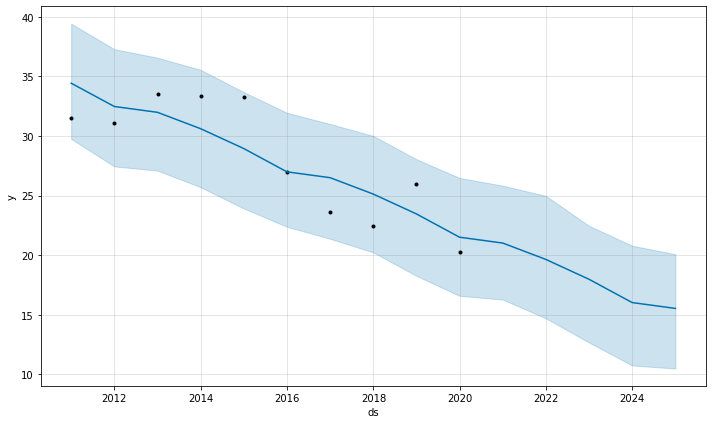

In [37]:
#quickly plot the results of our forecasts
model2.plot(forecast2,
              uncertainty=True)
plt.savefig('12.1.model2forecast.png', dpi=300, bbox_inches='tight')
plt.show();

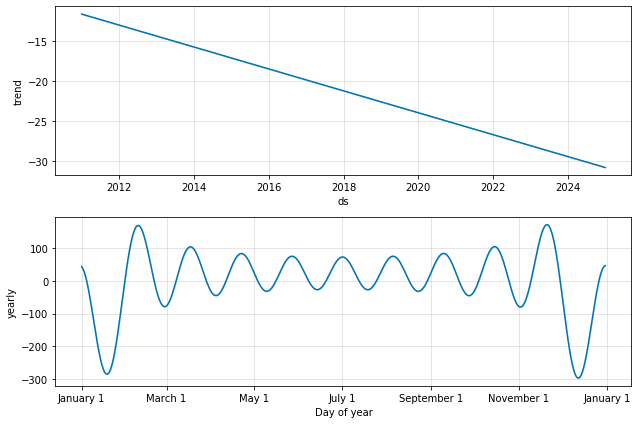

In [38]:
#components of our forecasts
model2.plot_components(forecast2)
plt.savefig('13.model2components.png', dpi=300, bbox_inches='tight')
plt.show();

In [39]:
#filtro 3
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])
df = df[df.REGION == '3-PACIFICO CENTRAL']
#cambio nombre columnas
df = df.rename(columns={'ANO': 'ds', 'TOTAL_POBREZA': 'y'})
#agrupar
df3  = df.drop(['NO_POBRES', 'POBREZA_NO_EXTREMA', 'POBREZA_EXTREMA', 'REGION'], axis=1)
df3['y']= df3['y'].astype('float64')
df3['ds'] = pd.DatetimeIndex(df3['ds'])
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 30 to 39
Data columns (total 2 columns):
ds    10 non-null datetime64[ns]
y     10 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [40]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model3 = Prophet(interval_width=0.95)

In [41]:
#fit method with our DataFrame
model3.fit(df3)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [42]:
#Prophet with a new DataFrame
future = model3.make_future_dataframe(periods=5, freq='y')
future.tail()

,ds
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31
14,2024-12-31


In [43]:
#DataFrame of future dates is then used as input to the predict method of our fitted model
forecast3 = model3.predict(future)
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2020-12-31,30.437086,27.024195,33.853824
11,2021-12-31,30.449787,26.963058,33.990220
12,2022-12-31,30.184723,26.791696,33.304314
13,2023-12-31,29.642653,25.935652,32.954126
14,2024-12-31,31.702293,28.473536,35.177559


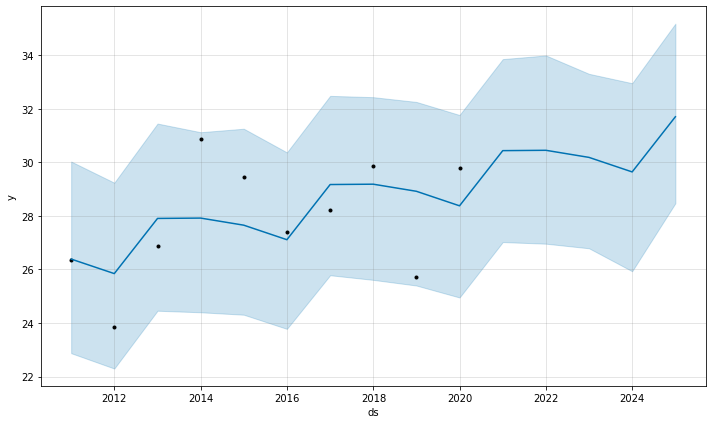

In [44]:
#quickly plot the results of our forecasts
model3.plot(forecast3,
              uncertainty=True)
plt.savefig('14.model3forecast.png', dpi=300, bbox_inches='tight')
plt.show();

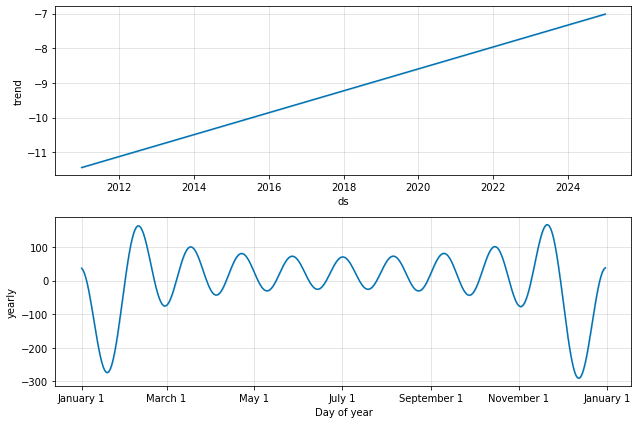

In [45]:
#components of our forecasts
model3.plot_components(forecast3)
plt.savefig('15.model3components.png', dpi=300, bbox_inches='tight')
plt.show();

In [46]:
#filtro 4
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])
df = df[df.REGION == '4-BRUNCA']
#cambio nombre columnas
df = df.rename(columns={'ANO': 'ds', 'TOTAL_POBREZA': 'y'})
#agrupar
df4  = df.drop(['NO_POBRES', 'POBREZA_NO_EXTREMA', 'POBREZA_EXTREMA', 'REGION'], axis=1)
df4['y']= df4['y'].astype('float64')
df4['ds'] = pd.DatetimeIndex(df4['ds'])
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 40 to 49
Data columns (total 2 columns):
ds    10 non-null datetime64[ns]
y     10 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [47]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model4 = Prophet(interval_width=0.95)

In [48]:
#fit method with our DataFrame
model4.fit(df4)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [49]:
#Prophet with a new DataFrame
future = model4.make_future_dataframe(periods=5, freq='y')
future.tail()

,ds
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31
14,2024-12-31


In [50]:
#DataFrame of future dates is then used as input to the predict method of our fitted model
forecast4 = model4.predict(future)
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2020-12-31,30.667205,26.875022,34.429002
11,2021-12-31,30.848599,27.046778,34.614937
12,2022-12-31,30.834090,27.346189,34.632991
13,2023-12-31,30.623336,26.925145,34.385020
14,2024-12-31,29.649994,26.055828,33.657925


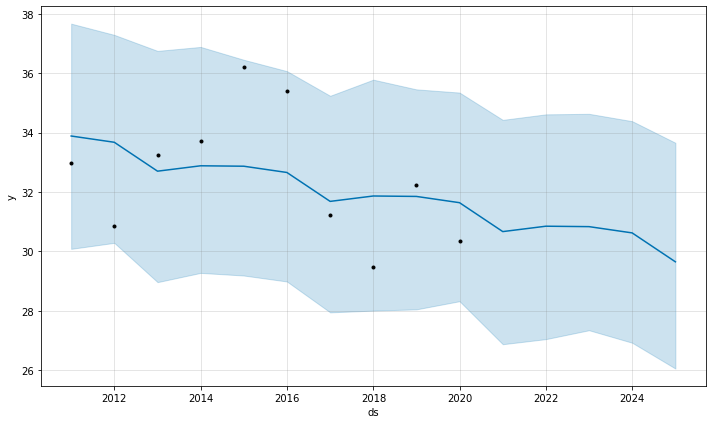

In [51]:
#quickly plot the results of our forecasts
model4.plot(forecast4,
              uncertainty=True)
plt.savefig('16.model4forecast.png', dpi=300, bbox_inches='tight')
plt.show();

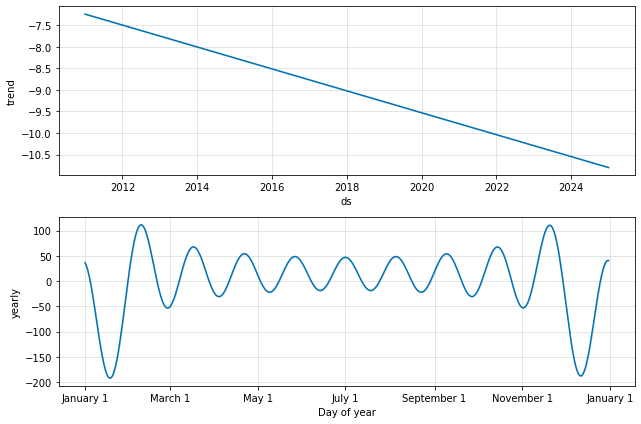

In [52]:
#components of our forecasts
model4.plot_components(forecast4)
plt.savefig('17.model4components.png', dpi=300, bbox_inches='tight')
plt.show();

In [53]:
#filtro 5
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])
df = df[df.REGION == '5-HUETAR CARIBE']
#cambio nombre columnas
df = df.rename(columns={'ANO': 'ds', 'TOTAL_POBREZA': 'y'})
#agrupar
df5  = df.drop(['NO_POBRES', 'POBREZA_NO_EXTREMA', 'POBREZA_EXTREMA', 'REGION'], axis=1)
df5['y']= df5['y'].astype('float64')
df5['ds'] = pd.DatetimeIndex(df5['ds'])
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 50 to 59
Data columns (total 2 columns):
ds    10 non-null datetime64[ns]
y     10 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [54]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model5 = Prophet(interval_width=0.95)

In [55]:
#fit method with our DataFrame
model5.fit(df5)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [56]:
#Prophet with a new DataFrame
future5 = model5.make_future_dataframe(periods=5, freq='y')
future.tail()

,ds
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31
14,2024-12-31


In [57]:
#DataFrame of future dates is then used as input to the predict method of our fitted model
forecast5 = model5.predict(future)
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2020-12-31,25.724446,24.068733,27.197324
11,2021-12-31,26.640324,25.277773,28.119943
12,2022-12-31,27.730351,26.358870,29.241900
13,2023-12-31,28.993095,27.485751,30.415663
14,2024-12-31,25.527232,24.002706,26.928553


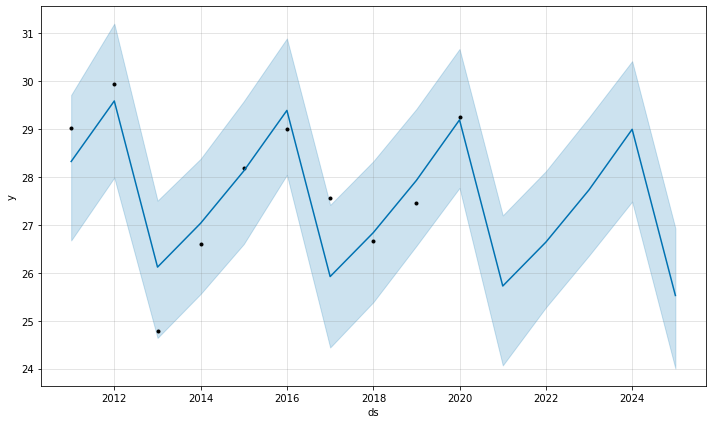

In [58]:
#quickly plot the results of our forecasts
model5.plot(forecast5,
              uncertainty=True)
plt.savefig('18.model5forecast.png', dpi=300, bbox_inches='tight')
plt.show();

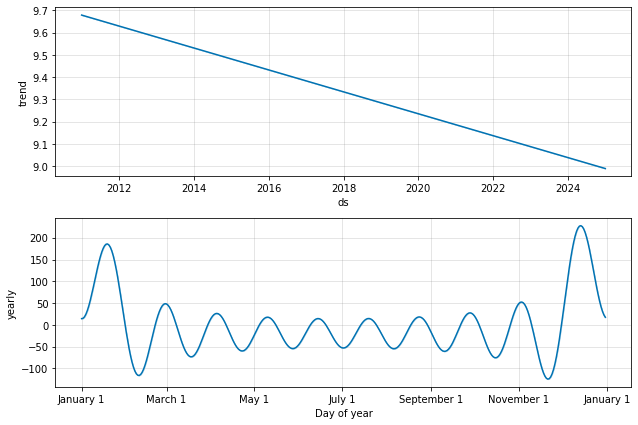

In [59]:
#components of our forecasts
model5.plot_components(forecast5)
plt.savefig('19.model5components.png', dpi=300, bbox_inches='tight')
plt.show();

In [60]:
#filtro 6
df = pd.read_csv('ENAHO2010_2019_REGION.csv', delimiter = ',', header=0, encoding = 'utf-8', decimal = '.')
df['REGION']= df['REGION'].astype('category')
df = df.rename(columns={' NO POBRES ': 'NO_POBRES', ' TOTAL POBREZA ': 'TOTAL_POBREZA', ' POBREZA NO EXTREMA ': 'POBREZA_NO_EXTREMA', ' POBREZA EXTREMA ': 'POBREZA_EXTREMA'})
df['ANO'] = pd.DatetimeIndex(df['ANO'])
df = df[df.REGION == '6-HUETAR NORTE']
#cambio nombre columnas
df = df.rename(columns={'ANO': 'ds', 'TOTAL_POBREZA': 'y'})
#agrupar
df6  = df.drop(['NO_POBRES', 'POBREZA_NO_EXTREMA', 'POBREZA_EXTREMA', 'REGION'], axis=1)
df6['y']= df6['y'].astype('float64')
df6['ds'] = pd.DatetimeIndex(df6['ds'])
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 60 to 69
Data columns (total 2 columns):
ds    10 non-null datetime64[ns]
y     10 non-null float64
dtypes: datetime64[ns](1), float64(1)
memory usage: 240.0 bytes


In [61]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
model6 = Prophet(interval_width=0.95)

In [62]:
#fit method with our DataFrame
model6.fit(df6)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations.Using 7.


In [63]:
#Prophet with a new DataFrame
future = model6.make_future_dataframe(periods=5, freq='y')
future.tail()

,ds
10,2020-12-31
11,2021-12-31
12,2022-12-31
13,2023-12-31
14,2024-12-31


In [64]:
#DataFrame of future dates is then used as input to the predict method of our fitted model
forecast6 = model6.predict(future)
forecast6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
10,2020-12-31,28.601773,26.153981,31.073574
11,2021-12-31,29.381799,26.923358,31.888391
12,2022-12-31,30.262930,27.928129,32.762240
13,2023-12-31,31.244673,28.543127,33.818228
14,2024-12-31,30.694119,28.092620,33.189563


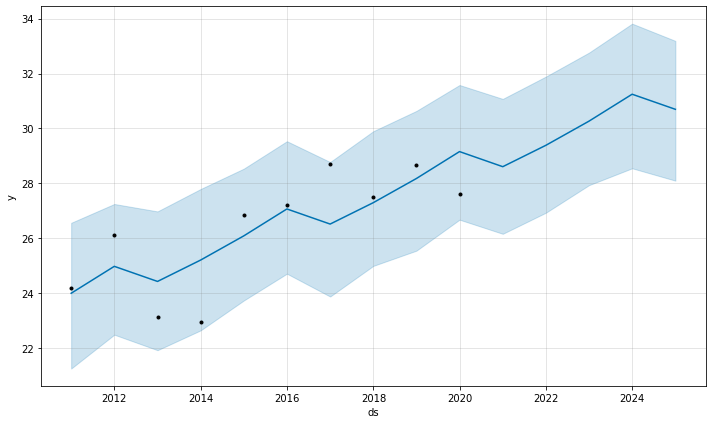

In [65]:
#quickly plot the results of our forecasts
model6.plot(forecast6,
              uncertainty=True)
plt.savefig('20.model6forecast.png', dpi=300, bbox_inches='tight')
plt.show();

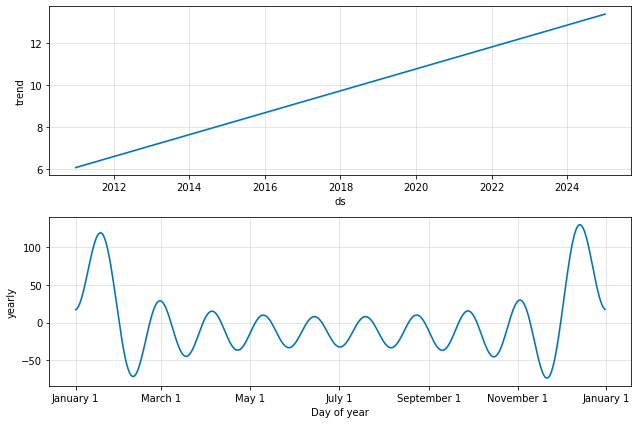

In [66]:
#components of our forecasts
model6.plot_components(forecast6)
plt.savefig('21.model6components.png', dpi=300, bbox_inches='tight')
plt.show();

In [67]:
#sintesis
forecast0[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast5[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2010-12-31,23.985876,21.239953,26.555067
1,2011-12-31,24.967621,22.475511,27.241659
2,2012-12-31,24.417070,21.909742,26.970822
3,2013-12-31,25.197099,22.632929,27.787798
4,2014-12-31,26.078233,23.721362,28.529450
5,2015-12-31,27.059979,24.699977,29.530461
6,2016-12-31,26.509428,23.866527,28.771419
7,2017-12-31,27.289453,24.983469,29.895417
8,2018-12-31,28.170584,25.538913,30.635050
9,2019-12-31,29.152327,26.669327,31.580217


In [68]:
#nuevas columnas
forecast0['REGION'] = forecast0['REGION']='0-TOTAL'
forecast0
forecast1['REGION'] = forecast1['REGION']='1-CENTRAL'
forecast1
forecast2['REGION'] = forecast2['REGION']='2-CHOROTEGA'
forecast2
forecast3['REGION'] = forecast3['REGION']='3-PACIFICO CENTRAL'
forecast3
forecast4['REGION'] = forecast4['REGION']='4-BRUNCA'
forecast4
forecast5['REGION'] = forecast5['REGION']='5-HUETAR CARIBE'
forecast5
forecast6['REGION'] = forecast6['REGION']='6-HUETAR NORTE'
forecast6

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,REGION
0,2010-12-31,6.064906,21.239953,26.555067,6.064906,6.064906,17.920969,17.920969,17.920969,17.920969,17.920969,17.920969,0.0,0.0,0.0,23.985876,6-HUETAR NORTE
1,2011-12-31,6.587638,22.475511,27.241659,6.587638,6.587638,18.379983,18.379983,18.379983,18.379983,18.379983,18.379983,0.0,0.0,0.0,24.967621,6-HUETAR NORTE
2,2012-12-31,7.111801,21.909742,26.970822,7.111801,7.111801,17.305269,17.305269,17.305269,17.305269,17.305269,17.305269,0.0,0.0,0.0,24.417070,6-HUETAR NORTE
3,2013-12-31,7.634532,22.632929,27.787798,7.634532,7.634532,17.562566,17.562566,17.562566,17.562566,17.562566,17.562566,0.0,0.0,0.0,25.197099,6-HUETAR NORTE
4,2014-12-31,8.157264,23.721362,28.529450,8.157264,8.157264,17.920969,17.920969,17.920969,17.920969,17.920969,17.920969,0.0,0.0,0.0,26.078233,6-HUETAR NORTE
5,2015-12-31,8.679995,24.699977,29.530461,8.679995,8.679995,18.379983,18.379983,18.379983,18.379983,18.379983,18.379983,0.0,0.0,0.0,27.059979,6-HUETAR NORTE
6,2016-12-31,9.204159,23.866527,28.771419,9.204159,9.204159,17.305269,17.305269,17.305269,17.305269,17.305269,17.305269,0.0,0.0,0.0,26.509428,6-HUETAR NORTE
7,2017-12-31,9.726887,24.983469,29.895417,9.726887,9.726887,17.562566,17.562566,17.562566,17.562566,17.562566,17.562566,0.0,0.0,0.0,27.289453,6-HUETAR NORTE
8,2018-12-31,10.249615,25.538913,30.635050,10.249615,10.249615,17.920969,17.920969,17.920969,17.920969,17.920969,17.920969,0.0,0.0,0.0,28.170584,6-HUETAR NORTE
9,2019-12-31,10.772344,26.669327,31.580217,10.772344,10.772344,18.379983,18.379983,18.379983,18.379983,18.379983,18.379983,0.0,0.0,0.0,29.152327,6-HUETAR NORTE


In [69]:
#concatenate outputs
sintesis = pd.concat([forecast0, forecast1, forecast2, forecast3, forecast4, forecast5, forecast6], axis=0)
sintesis

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,REGION
0,2010-12-31,-0.269674,20.571302,21.990720,-0.269674,-0.269674,21.567311,21.567311,21.567311,21.567311,21.567311,21.567311,0.0,0.0,0.0,21.297637,0-TOTAL
1,2011-12-31,-0.202066,21.046115,22.422962,-0.202066,-0.202066,21.981088,21.981088,21.981088,21.981088,21.981088,21.981088,0.0,0.0,0.0,21.779021,0-TOTAL
2,2012-12-31,-0.134273,19.834219,21.173825,-0.134273,-0.134273,20.645119,20.645119,20.645119,20.645119,20.645119,20.645119,0.0,0.0,0.0,20.510846,0-TOTAL
3,2013-12-31,-0.066665,20.386953,21.708179,-0.066665,-0.066665,21.121727,21.121727,21.121727,21.121727,21.121727,21.121727,0.0,0.0,0.0,21.055061,0-TOTAL
4,2014-12-31,0.000941,20.905961,22.266127,0.000941,0.000941,21.567311,21.567311,21.567311,21.567311,21.567311,21.567311,0.0,0.0,0.0,21.568252,0-TOTAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,2020-12-31,11.296504,26.153981,31.073574,11.296503,11.296505,17.305269,17.305269,17.305269,17.305269,17.305269,17.305269,0.0,0.0,0.0,28.601773,6-HUETAR NORTE
11,2021-12-31,11.819232,26.923358,31.888391,11.819230,11.819234,17.562566,17.562566,17.562566,17.562566,17.562566,17.562566,0.0,0.0,0.0,29.381799,6-HUETAR NORTE
12,2022-12-31,12.341961,27.928129,32.762240,12.341956,12.341964,17.920969,17.920969,17.920969,17.920969,17.920969,17.920969,0.0,0.0,0.0,30.262930,6-HUETAR NORTE
13,2023-12-31,12.864689,28.543127,33.818228,12.864683,12.864695,18.379983,18.379983,18.379983,18.379983,18.379983,18.379983,0.0,0.0,0.0,31.244673,6-HUETAR NORTE


In [70]:
sintesis.dtypes

ds                            datetime64[ns]
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
REGION                                object
dtype: object

In [71]:
sintesis = sintesis.drop(['trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper', 'additive_terms', 'additive_terms_lower', 'additive_terms_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower', 'multiplicative_terms_upper'], axis=1)
sintesis

,ds,yhat,REGION
0,2010-12-31,21.297637,0-TOTAL
1,2011-12-31,21.779021,0-TOTAL
2,2012-12-31,20.510846,0-TOTAL
3,2013-12-31,21.055061,0-TOTAL
4,2014-12-31,21.568252,0-TOTAL
...,...,...,...
10,2020-12-31,28.601773,6-HUETAR NORTE
11,2021-12-31,29.381799,6-HUETAR NORTE
12,2022-12-31,30.262930,6-HUETAR NORTE
13,2023-12-31,31.244673,6-HUETAR NORTE


In [72]:
sintesis.ds>'2019-12-31'
sintesis['ds'] = pd.DatetimeIndex(sintesis['ds']).year
sintesis

,ds,yhat,REGION
0,2010,21.297637,0-TOTAL
1,2011,21.779021,0-TOTAL
2,2012,20.510846,0-TOTAL
3,2013,21.055061,0-TOTAL
4,2014,21.568252,0-TOTAL
...,...,...,...
10,2020,28.601773,6-HUETAR NORTE
11,2021,29.381799,6-HUETAR NORTE
12,2022,30.262930,6-HUETAR NORTE
13,2023,31.244673,6-HUETAR NORTE


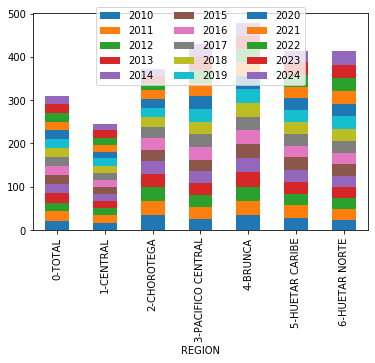

In [74]:
sintesis.groupby(["REGION", "ds"]).sum()["yhat"].unstack().plot(kind='bar', stacked=True)
plt.legend(loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05))
plt.savefig('22.barsintesis.png', dpi=300, bbox_inches='tight')
plt.show();

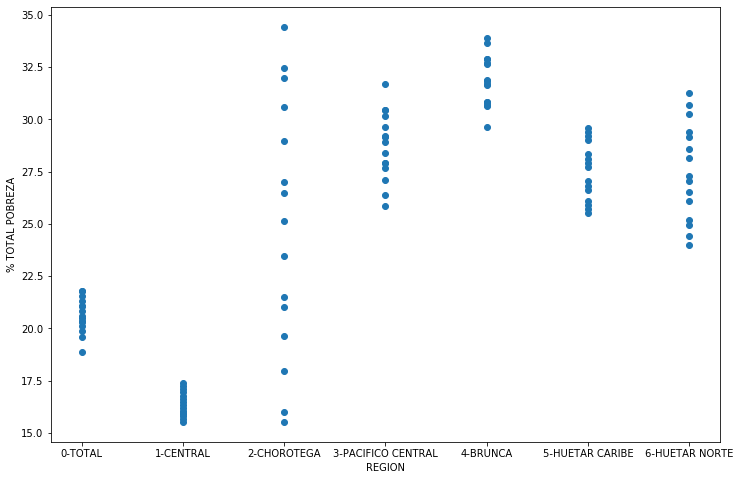

In [75]:
# Plotting a scatterplot
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(sintesis['REGION'], sintesis['yhat'])
ax.set_xlabel('REGION')
ax.set_ylabel('% TOTAL POBREZA')
plt.savefig('23.scatterplotsintesis.png', dpi=300, bbox_inches='tight')
plt.show();